<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_10_(12_Feb)_Investico_Airlines_(Log_reg_%26_Shapely).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load dataset
file_path = "Invistico_Airline.xlsx"
df = pd.read_excel(file_path)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Numeric NaNs → Median
df.fillna(df.mode().iloc[0], inplace=True)  # Categorical NaNs → Most frequent

# Encode target variable (Satisfaction: Satisfied=1, Neutral or Dissatisfied=0)
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == "satisfied" else 0)

# Encode categorical variables
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features and target
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print Evaluation Metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11675
           1       0.85      0.85      0.85     14301

    accuracy                           0.84     25976
   macro avg       0.84      0.84      0.84     25976
weighted avg       0.84      0.84      0.84     25976



Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     11675
           1       0.85      0.85      0.85     14301

    accuracy                           0.84     25976
   macro avg       0.84      0.84      0.84     25976
weighted avg       0.84      0.84      0.84     25976

Accuracy Score: 0.83811980289498


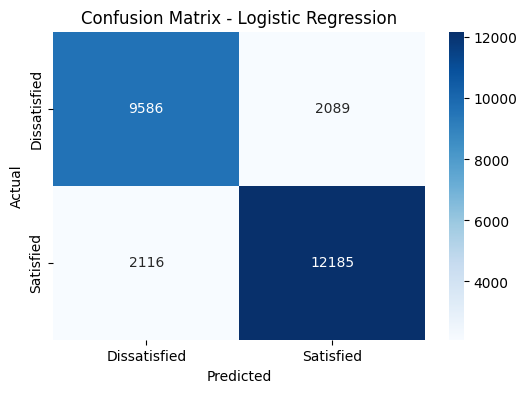

<ipython-input-4-c26088b7cecd>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')


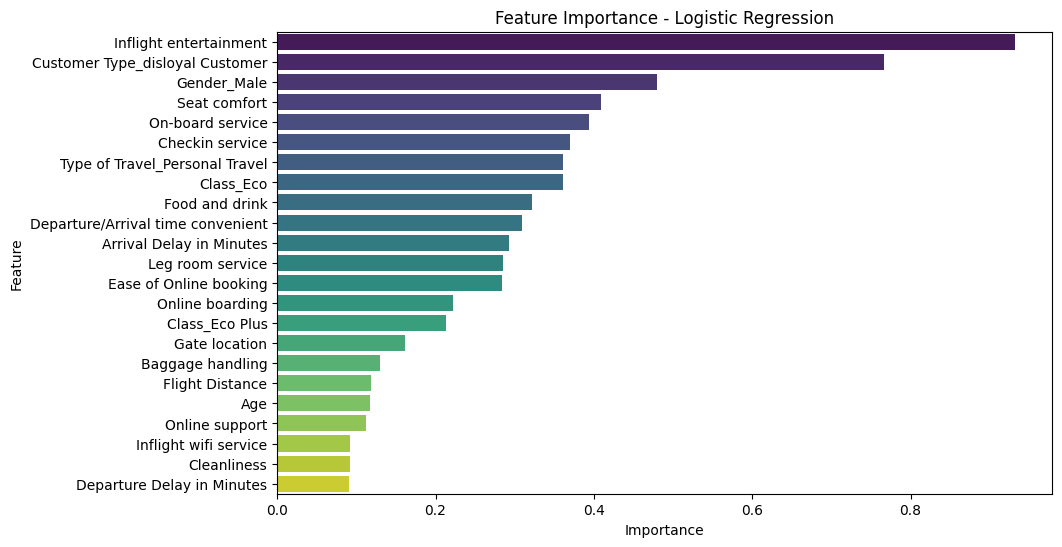

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
file_path = "Invistico_Airline.xlsx"
df = pd.read_excel(file_path)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Numeric NaNs → Median
df.fillna(df.mode().iloc[0], inplace=True)  # Categorical NaNs → Most frequent

# Encode target variable (Satisfaction: Satisfied=1, Neutral or Dissatisfied=0)
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == "satisfied" else 0)

# Encode categorical variables
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features and target
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=["Dissatisfied", "Satisfied"], yticklabels=["Dissatisfied", "Satisfied"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Feature Importance (Logistic Regression Coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Logistic Regression")
plt.show()
